In [22]:
!pip install datasets
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.sample(5)


Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\User\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Aug 20 15:52:27 2024).


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
276310,Software Engineer,Product Analyst,"Lisbon, Portugal",via Empregos Trabajo.org,Full-time,False,Portugal,2023-08-13 07:21:48,True,False,Portugal,None,NaN,NaN,The Esports Network- Jobboard,"[sql, python, excel, tableau, looker, chef]","{'analyst_tools': ['excel', 'tableau', 'looker..."
524013,Data Scientist,4559 Data Scientist,"Gloucester, UK",via SimplyHired,Full-time,False,United Kingdom,2023-02-07 11:15:24,False,False,United Kingdom,None,NaN,NaN,Gloucestershire Constabulary,None,None
95046,Senior Data Scientist,Senior Data Scientist (Real-World Evidence or ...,"Chennai, Tamil Nadu, India",via Recruit.net,Full-time,False,India,2023-07-31 00:11:02,False,False,India,None,NaN,NaN,ICON Clinical Research Limited,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
740669,Business Analyst,Strategic Sales Analyst. Job in Greenville My ...,"Greenville, SC",via My Valley Jobs Today,Full-time,False,Georgia,2023-05-05 22:19:33,True,False,United States,None,NaN,NaN,Insight Global,"[sql, python, azure]","{'cloud': ['azure'], 'programming': ['sql', 'p..."
133914,Data Engineer,Data Warehouse Development Engineer— Douyin Li...,"Shanghai, China",via 工作搜索引擎,Full-time,False,China,2023-09-02 08:35:26,True,False,China,None,NaN,NaN,Byte Dance,[sql],{'programming': ['sql']}


In [23]:
df_DA_india = df[(df['job_country'] == 'India') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_india.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
423562,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via Shine,Full-time,False,India,2023-12-02 16:23:39,True,False,India,None,NaN,NaN,Cinereous Technologies pvt Ltd,None,None
234011,Data Analyst,Data & Analytics Manager,Anywhere,via LinkedIn,Full-time,True,India,2023-06-27 07:33:56,False,False,India,None,NaN,NaN,1707 Capital,"[python, r, sql, nosql, aws, kafka, airflow, s...","{'analyst_tools': ['excel'], 'cloud': ['aws'],..."
658332,Data Analyst,Lead Data Analyst | (IHR960),India,via Shine,Full-time,False,India,2023-11-13 10:48:43,True,False,India,None,NaN,NaN,Benchmark Executive,"[c, sql, python]","{'programming': ['c', 'sql', 'python']}"
15229,Data Analyst,Sr. Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Full-time,False,India,2023-09-19 13:10:47,False,False,India,None,NaN,NaN,VOZIQ AI,"[sql, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
553132,Data Analyst,Data Analytics Intern (Paid),Anywhere,via LinkedIn,Full-time and Internship,True,India,2023-10-12 19:30:35,False,False,India,None,NaN,NaN,Idealmet Technologies,"[sql, python, r, sql server, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'datab..."


In [24]:
len(df_DA_india)

6121

In [25]:
df_DA_india = df_DA_india.dropna(subset= 'salary_year_avg')
df_DA_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
11412,Data Analyst,Data Quality Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-15 13:12:15,False,False,India,year,50400.0,NaN,IntegriChain,"[python, sql, aws, azure, excel, jenkins, git]","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
27487,Data Analyst,Data Architect 2023,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-12 13:14:51,True,False,India,year,165000.0,NaN,Bosch Group,"[mongo, sql, python, mongodb, mongodb, sql ser...","{'analyst_tools': ['power bi'], 'cloud': ['azu..."
29583,Data Analyst,Senior Business & Data Analyst,India,via Ai-Jobs.net,Full-time,False,India,2023-11-21 13:12:12,False,False,India,year,119250.0,NaN,Deutsche Bank,"[sql, visio, excel, jira, confluence]","{'analyst_tools': ['visio', 'excel'], 'async':..."
32890,Data Analyst,Data Analyst - Transport,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 13:34:25,True,False,India,year,105000.0,NaN,GoTo Group,"[sql, swift, tableau, git]","{'analyst_tools': ['tableau'], 'other': ['git'..."
41257,Data Analyst,Junior Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-08-08 06:13:06,False,False,India,year,57500.0,NaN,WPP,"[sql, alteryx]","{'analyst_tools': ['alteryx'], 'programming': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774606,Data Analyst,Financial Data Analyst,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-04-11 01:10:35,False,False,India,year,79200.0,NaN,Visa,"[python, r, vba, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
774809,Data Analyst,IN RBIN Dy. Manager/ Asst Manager Data Analyst...,"Nashik, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-03-28 01:21:16,False,False,India,year,102500.0,NaN,Bosch Group,"[python, sql, pandas, numpy, excel, sharepoint]","{'analyst_tools': ['excel', 'sharepoint'], 'li..."
777313,Data Analyst,Data Analyst,"Pune, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-01-10 05:12:09,False,False,India,year,111202.0,NaN,Poshmark,"[sql, python, r, spark, express, excel, looker...","{'analyst_tools': ['excel', 'looker', 'powerpo..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"


In [26]:
len(df_DA_india)

94

In [27]:
df_DA_india_exploded = df_DA_india.explode('job_skills')
df_DA_india_exploded[['job_skills' , 'salary_year_avg']].head(10)

,job_skills,salary_year_avg
11412,python,50400.0
11412,sql,50400.0
11412,aws,50400.0
11412,azure,50400.0
11412,excel,50400.0
11412,jenkins,50400.0
11412,git,50400.0
27487,mongo,165000.0
27487,sql,165000.0
27487,python,165000.0


In [28]:
df_DA_skills = df_DA_india_exploded.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by= 'count' , ascending= False)
df_DA_skills

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
...,...,...
postgresql,1,165000.0
ms access,1,64600.0
mysql,1,165000.0


In [29]:
DA_job_count = len(df_DA_india)
DA_job_count

94

In [30]:
df_DA_skills = df_DA_skills.rename(columns= {'count': 'skills_count' , 'median': 'median_salary'})
df_DA_skills

,skills_count,median_salary
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
...,...,...
postgresql,1,165000.0
ms access,1,64600.0
mysql,1,165000.0


In [31]:
df_DA_skills['skill_percent'] = df_DA_skills['skills_count'] / DA_job_count * 100
df_DA_skills

,skills_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


In [32]:
skill_percent = 6

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skills_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


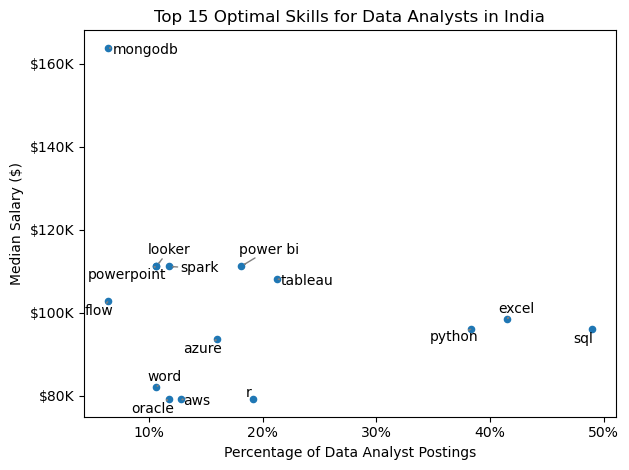

In [33]:
df_DA_skills_high_demand.plot(x= 'skill_percent' , y= 'median_salary' , kind= 'scatter')

texts = []

for i, txt in enumerate(df_DA_skills_high_demand.index):
  texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i] , df_DA_skills_high_demand['median_salary'].iloc[i], txt, ha= 'center', va= 'center'))

!pip install adjustText
from adjustText import adjust_text
adjust_text(texts, arrowprops = dict(arrowstyle= '->' , color= 'grey'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals= 0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title(f'Top {len(df_DA_skills_high_demand)} Optimal Skills for Data Analysts in India')
plt.xlabel('Percentage of Data Analyst Postings')
plt.ylabel('Median Salary ($)')
plt.tight_layout()
plt.show()


In [34]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [35]:
df_technology = df_DA_india['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()

df_technology

11412     {'analyst_tools': ['excel'], 'cloud': ['aws', ...
27487     {'analyst_tools': ['power bi'], 'cloud': ['azu...
29583     {'analyst_tools': ['visio', 'excel'], 'async':...
32890     {'analyst_tools': ['tableau'], 'other': ['git'...
41257     {'analyst_tools': ['alteryx'], 'programming': ...
                                ...                        
764546      {'analyst_tools': ['sap'], 'cloud': ['oracle']}
768056    {'analyst_tools': ['tableau', 'alteryx'], 'clo...
774606    {'analyst_tools': ['excel', 'power bi'], 'prog...
774809    {'analyst_tools': ['excel', 'sharepoint'], 'li...
784033           {'analyst_tools': ['power bi', 'tableau']}
Name: job_type_skills, Length: 78, dtype: object

In [36]:
technology_dict = {}

for row in df_technology:
  row_dict = ast.literal_eval(row)
  for key, value in row_dict.items():
    if key in technology_dict:
      technology_dict[key] += value
    else:
      technology_dict[key] = value

for key, value in technology_dict.items():
  technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'ms access',
  'outlook',
  'sharepoint',
  'ssis',
  'power bi',
  'sheets',
  'dax',
  'sas',
  'spss',
  'powerpoint',
  'word',
  'looker',
  'qlik',
  'excel',
  'tableau',
  'sap',
  'visio'],
 'cloud': ['azure',
  'aws',
  'redshift',
  'bigquery',
  'oracle',
  'gcp',
  'databricks',
  'snowflake'],
 'other': ['docker',
  'jenkins',
  'unreal',
  'gitlab',
  'terminal',
  'git',
  'bitbucket',
  'github',
  'flow',
  'kubernetes'],
 'programming': ['t-sql',
  'sql',
  'shell',
  'scala',
  'r',
  'sas',
  'go',
  'nosql',
  'swift',
  'java',
  'vba',
  'mongodb',
  'c',
  'bash',
  'mongo',
  'no-sql',
  'python'],
 'databases': ['sql server',
  'neo4j',
  'elasticsearch',
  'dynamodb',
  'postgresql',
  'mongodb',
  'db2',
  'mysql',
  'cassandra'],
 'libraries': ['spark',
  'pytorch',
  'hadoop',
  'pyspark',
  'matplotlib',
  'numpy',
  'airflow',
  'gdpr',
  'spring',
  'pandas',
  'kafka',
  'tensorflow',
  'plotly',
  'electron'],
 'async'

In [37]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns= ['technology' , 'skills'])
df_technology

,technology,skills
0,analyst_tools,"[alteryx, ms access, outlook, sharepoint, ssis..."
1,cloud,"[azure, aws, redshift, bigquery, oracle, gcp, ..."
2,other,"[docker, jenkins, unreal, gitlab, terminal, gi..."
3,programming,"[t-sql, sql, shell, scala, r, sas, go, nosql, ..."
4,databases,"[sql server, neo4j, elasticsearch, dynamodb, p..."
5,libraries,"[spark, pytorch, hadoop, pyspark, matplotlib, ..."
6,async,"[confluence, jira]"
7,os,"[windows, linux, unix]"
8,sync,"[zoom, slack, unify]"
9,webframeworks,[express]


In [38]:
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,ms access
0,analyst_tools,outlook
0,analyst_tools,sharepoint
0,analyst_tools,ssis
...,...,...
7,os,unix
8,sync,zoom
8,sync,slack
8,sync,unify


In [39]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on= 'job_skills', right_on= 'skills')
df_plot

,skills_count,median_salary,skill_percent,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


In [40]:
df_plot.head(15)
df_plot_final = df_plot.head(15)
df_plot_final

,skills_count,median_salary,skill_percent,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


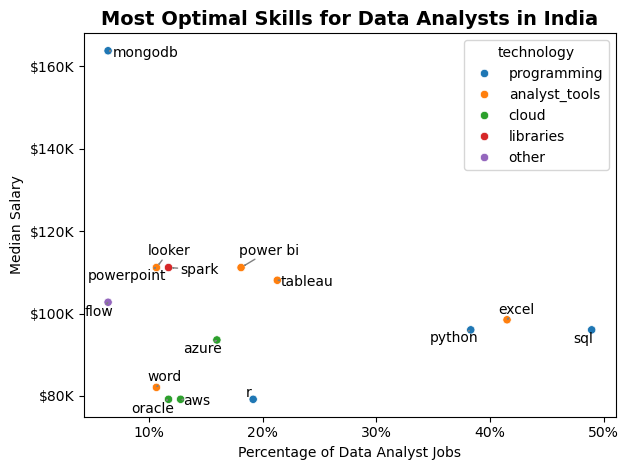

In [41]:
import seaborn as sns

sns.scatterplot(data= df_plot_final, x= 'skill_percent', y= 'median_salary', hue= 'technology')

texts = []
for i, txt in enumerate(df_plot_final['skills']):
  texts.append(plt.text(df_plot_final['skill_percent'].iloc[i], df_plot_final['median_salary'].iloc[i], txt, ha='center', va='center'))

from adjustText import adjust_text
adjust_text(texts, arrowprops = dict(arrowstyle= '->', color= 'grey'))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Most Optimal Skills for Data Analysts in India', fontweight= 'bold', fontsize= 14)
plt.ylabel('Median Salary')
plt.xlabel('Percentage of Data Analyst Jobs')
plt.tight_layout()
plt.show()